In [ ]:
# # importing required classes
# from pypdf import PdfReader

# # creating a pdf reader object
# reader = PdfReader('muon_flux.pdf')

# # printing number of pages in pdf file
# print(len(reader.pages))

# # creating a page object
# page = reader.pages[1]

# # extracting text from page
# print(page.extract_text())

2
Table 3
Atmospheric muon ﬂux at sea level (continued).
µ + µ −
Momentum
range
(GeV/c)
P
(GeV/c)
Flux±∆ Fsta ± ∆ Fsys
(m− 2sr− 1s− 1(GeV/c)− 1)
P
(GeV/c)
Flux±∆ Fsta ± ∆ Fsys
(m− 2sr− 1s− 1(GeV/c)− 1)
5.79– 6.24 6.01 1.63 ±0.02 ±0.04 6.01 1.24 ±0.02 ±0.03
6.24– 6.73 6.48 1.44 ±0.02 ±0.03 6.48 1.13 ±0.02 ±0.02
6.73– 7.25 6.98 1.21 ±0.02 ±0.03 6.98 0.96 ±0.01 ±0.02
7.25– 7.81 7.52 1.06 ±0.01 ±0.02 7.52 0.83 ±0.01 ±0.02
7.81– 8.41 8.10 9.11 ±0.13 ±0.21 ×10− 1 8.10 6.93 ±0.11 ±0.15 ×10− 1
8.41– 9.06 8.72 8.07 ±0.11 ±0.19 ×10− 1 8.72 6.08 ±0.10 ±0.13 ×10− 1
9.06– 9.76 9.40 7.06 ±0.10 ±0.16 ×10− 1 9.40 5.15 ±0.09 ±0.11 ×10− 1
9.76– 10.5 10.1 5.67 ±0.09 ±0.13 ×10− 1 10.1 4.54 ±0.08 ±0.10 ×10− 1
10.5– 11.3 10.9 4.90 ±0.08 ±0.11 ×10− 1 10.9 3.85 ±0.07 ±0.08 ×10− 1
11.3– 12.2 11.8 4.38 ±0.07 ±0.10 ×10− 1 11.8 3.24 ±0.06 ±0.07 ×10− 1
12.2– 13.2 12.7 3.58 ±0.06 ±0.08 ×10− 1 12.7 2.74 ±0.06 ±0.06 ×10− 1
13.2– 14.2 13.6 3.07 ±0.06 ±0.07 ×10− 1 13.7 2.31 ±0.05 ±0.05 ×10− 1
14.2– 15.3 14.7 2.49 ±0.05

In [9]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def exp(x, N, t, C):
    """
    Exponential function to fit the data with uniform background.
    :param x: x values
    :param N: Amplitude
    :param t: Decay constant in 1/us
    :param C: Background constant
    """
    return N * np.exp(-x/t) + C

# Exp. Muon Data Analysis

In [ ]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
data = pd.read_csv('24-10-17-20-58.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
data2 = pd.read_csv('24-10-23-18-15.data', sep=' ', header=None, names=['dt', 'time'], dtype={'dt': np.float64, 'time': np.int64})
# data['time'] = data['time']- data['time'].min()
# data.append(data2)
# data



AttributeError: 'DataFrame' object has no attribute 'append'

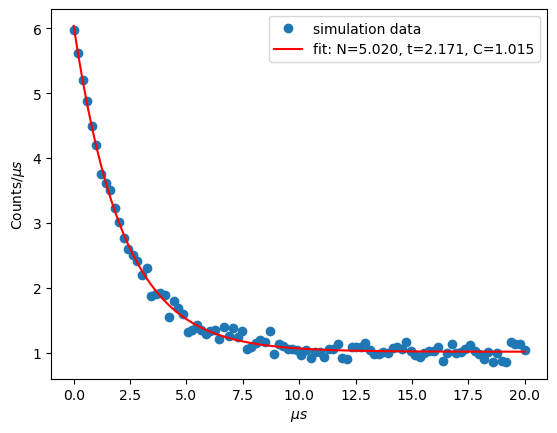

In [59]:
def simulate_data_exp(sims, N, t, C, noise=0.1):
    """
    Simulate data with exponential decay and uniform background.
    :param sims: Number of simulations
    :param N: Amplitude
    :param t: Decay constant
    :param C: Background constant
    :param noise: Noise level
    """
    x = np.linspace(0, 20, sims)
    y = exp(x, N, t, C)
    y += noise * np.random.randn(sims)
    return x, y


# Simulate data
t = 2.2 # Decay constant in 1/us
x, y = simulate_data_exp(100, 5, t, 1)

# Fit the data
popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

plt.plot(x, y, 'o', label='simulation data')
plt.plot(x, exp(x, *popt), 'r-', label='fit: N=%5.3f, t=%5.3f, C=%5.3f' % tuple(popt))
plt.xlabel('$\mu s$')
plt.ylabel('Counts/$\mu s$')
plt.legend()
plt.show()



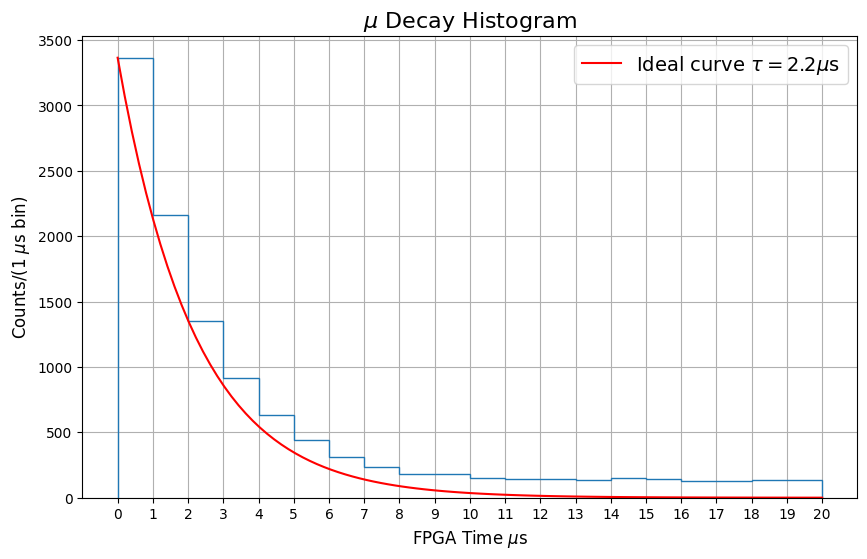

In [5]:
# plt.figure(figsize=(10, 6))
# hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
# plt.xticks(np.arange(0, 21, 1));

# plt.grid()

# # Plot the data using literature value of 2.2 us
# t = 2.2 # Decay constant in 1/us
# plt.plot(np.linspace(0, 20, 100), exp(np.linspace(0, 20, 100), np.max(hist[0]), t, 0), 'r-', label='Ideal curve $τ = 2.2\mu$s')
# plt.title("$\mu$ Decay Histogram", fontsize=16)
# plt.xlabel('FPGA Time $\mu$s',fontsize=12)
# plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
# plt.legend(fontsize=14)
# # plt.show()
# # plt.savefig('muonPHY451_fig6.jpg', dpi=400)


In [ ]:
# def simulate_data_exp(sims, N, t, C, noise=0.1):
#     """
#     Simulate data with exponential decay and uniform background.
#     :param sims: Number of simulations
#     :param N: Amplitude
#     :param t: Decay constant
#     :param C: Background constant
#     :param noise: Noise level
#     """
#     x = np.linspace(0, 20, sims)
#     y = exp(x, N, t, C)
#     y += noise * np.random.randn(sims)
#     return x, y


# # Simulate data
# t = 2.2 # Decay constant in 1/us
# x, y = simulate_data_exp(100, np.max(hist[0]), t, 1)

# # Fit the data
# popt, pcov = curve_fit(exp, x, y, p0=[5, 1, 1])

In [122]:
x = np.arange(0.5,20) # middle of bins
popt, pcov = curve_fit(exp, x, hist[0], p0=[150, t, 1])
print(popt)
print(np.sqrt(np.diag(pcov)))

[232.54451372   1.77571667   2.32392922]
[10.12374834  0.12029088  1.69669434]


1.6923076923076923

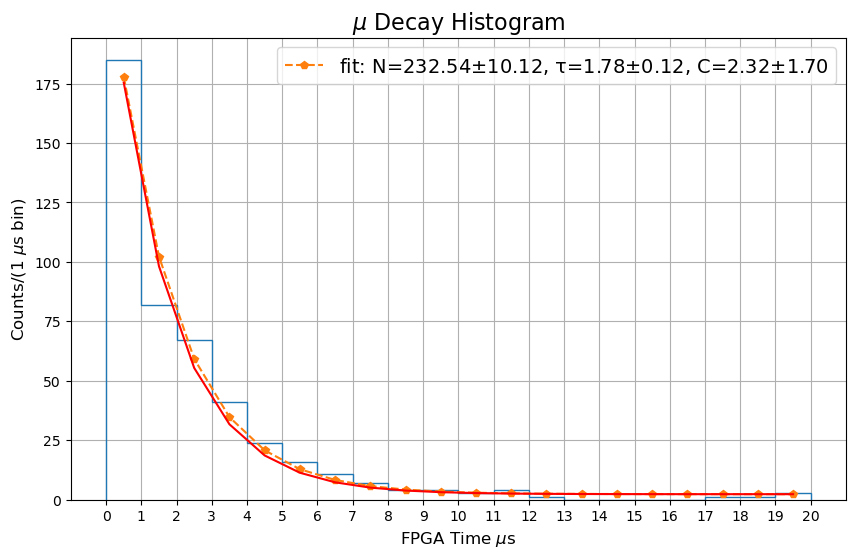

In [137]:
plt.figure(figsize=(10, 6))
hist = plt.hist(data['dt'][data['dt']<20000]/1000, bins=20, histtype='step', range = (0, 20), linewidth=1)
plt.xticks(np.arange(0, 21, 1));

plt.grid()

# Plot the data using literature value of 2.2 us
t = 2.2 # Decay constant in 1/us
obs_t = t/1.3

plt.plot(x, exp(x, *popt), 'p--', label=f'fit: N={popt[0]:.2f}$\pm${np.sqrt(np.diag(pcov))[0]:.2f}, τ={popt[1]:.2f}$\pm${np.sqrt(np.diag(pcov))[1]:.2f}, C={popt[2]:.2f}$\pm${np.sqrt(np.diag(pcov))[2]:.2f}')

plt.xlabel('FPGA Time $\mu$s',fontsize=12)
plt.ylabel('Counts/(1 $\mu$s bin)', fontsize=12)
plt.legend(fontsize=14)

plt.plot(x, exp(x, popt[0], t, popt[2]), 'r-', label='Ideal curve $τ = 2.2\mu$s')
plt.title("$\mu$ Decay Histogram", fontsize=16)

# plt.show()
# plt.savefig('muonPHY451_fig6.jpg', dpi=400)




631.5761631867912


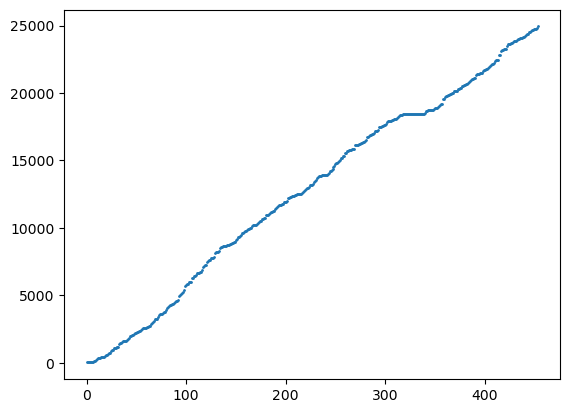

In [ ]:
# See if muon flux is constant with time

gate = data['dt']<20000

plt.scatter(np.arange(len(data['dt'][gate])), data['time'][gate], s=1)

print(len(data)/data['time'].max()*60)

# Extrapolating Muon Ratio $\mu^+/\mu^-$ 

[Measurements of Primary and Atmospheric Cosmic-Ray Spectra with the BESS-TeV Spectrometer 2004](http://arxiv.org/abs/astro-ph/0403704v1)


2.108465385776464

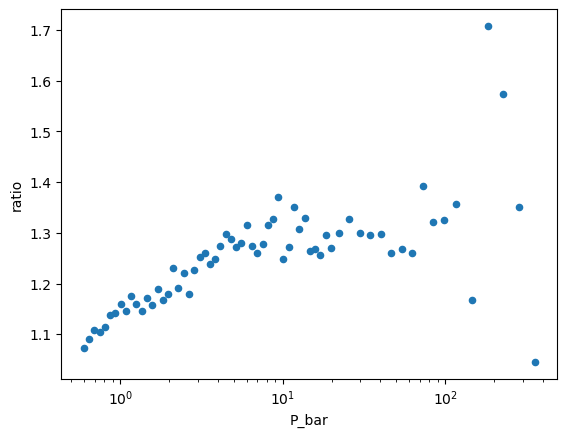

<Figure size 640x480 with 0 Axes>

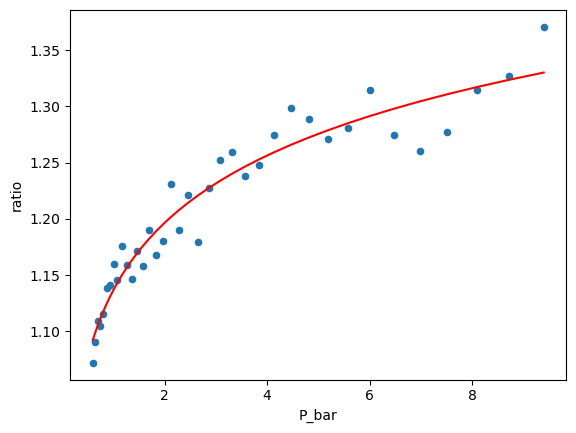

In [8]:
# Read in data
# data = np.loadtxt('24-10-17-11-11.data')
ratio_data = pd.read_csv('muon_flux.txt', sep=' ', header=None, names=['P_bar_+', 'muon_+', 'P_bar_-', 'muon_-'])
ratio_data['P_bar'] = (ratio_data['P_bar_+'] + ratio_data['P_bar_-']) / 2
ratio_data['ratio'] = ratio_data['muon_+'] / ratio_data['muon_-']

ratio_data.plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=True)

mask = ratio_data['P_bar'] < 10

plt.figure()
ratio_data[mask].plot(x='P_bar', y='ratio', kind='scatter', logy=False, logx=False)

def log_func(x, a, b):
    return a * np.log(x) + b

params, cov = curve_fit(log_func, ratio_data[mask]['P_bar'], ratio_data[mask]['ratio'])
plt.plot(ratio_data[mask]['P_bar'], log_func(ratio_data[mask]['P_bar'], *params), 'r-')


ratio = log_func(0.12011, *params)
def t_obs(t_pos,t_neg,ratio):
    return (1+ratio)*(t_neg * t_pos)/(t_pos + ratio*t_neg)
t_obs(2.2, 2.0280, ratio)
# print(params)